# Redes Neurais Artificiais
 **Nome: João Pedro Miranda Marques**
 
 **Matrícula: 2017050495** 

## K-means RBF

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
import numpy as np
from sklearn.cluster import KMeans

def trainRBF(xin, yin, p):

    # Função Radial Gaussiana
    def pdfnvar(x, m, K, n):
        if(n == 1):
            r = np.sqrt(int(K))
            px = (1/(np.sqrt(2*np.pi*r*r)))*np.exp(-0.5 * ((x-m)/(r))**2)
        else:
            px = ((1/np.sqrt((2*np.pi)**n * (np.linalg.det(K))))) * np.exp(-0.5*((x-m) @ (np.linalg.inv(K) @ np.transpose(x-m))))
        return px

    nSamples = xin.shape[0]     # Numero de amostras.
    nDimension = xin.shape[1]     # Dimensao de entrada.  

    xin = np.matrix(xin)  # garante que xin seja matriz
    yin = np.matrix(yin)  # garante que yin seja matriz

    #clusteriza os dados de entrada por meio do algorítmo K-médias
    xclust = KMeans(n_clusters=p).fit(xin)

    # Armazena vetores de centros das funções
    m = np.matrix(xclust.cluster_centers_)
    covlist = []
    
    # Estima matrizes de covarância para todos os centros
    for i in range(p):
        ici = np.where(xclust.labels_ == i)
        xci = xin[ici,]
        if nDimension == 1:
            covi = np.var(xci)
        else:
            covi = np.cov(xci[0], rowvar=False)
        covlist.append(covi)

    # H = np.matrix([nSamples, p])
    H =  np.zeros((nSamples, p))

    #calcula matriz H
    for j in range(nSamples):
        for i in range(p):
            mi = m[i,]
            covi = np.transpose(covlist[i]) + 0.001*np.identity(nDimension)
            aux = pdfnvar(xin[j,], mi, covi, nSamples)
            aux = np.asarray(aux)
            H[j][i] = aux[0]
    
    print("\n H: ", H)
    print("\n H.shape: ", H.shape)

    Haug = np.concatenate((np.ones(H.shape[0], dtype=float), H), axis=1)
    W = ( np.linalg.pinv(Haug) @ yin)    # W<−pseudoinverse(Haug) %*% yin 

    return [m, covlist, W, H]


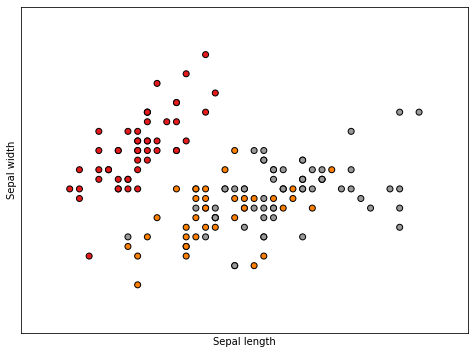


 H:  [[6.08999623e-022 1.28294588e-057 1.14261129e-020 8.01192416e-023
  1.19826354e-058 1.02558146e-081]
 [3.79796169e-021 7.67512488e-060 8.77413680e-025 3.98859382e-025
  1.26441699e-052 7.34524595e-082]
 [1.72296574e-020 3.08187159e-063 1.31340413e-024 5.68911269e-027
  1.66226488e-054 6.35033071e-087]
 [7.57368855e-021 1.01523395e-061 1.17698925e-024 6.09495736e-028
  5.15752414e-049 7.72647347e-085]
 [2.43353227e-022 1.43600726e-058 8.50562024e-021 3.54789278e-024
  9.93565152e-059 1.06397983e-083]
 [2.86250361e-027 1.18045915e-050 6.61558415e-025 5.56047336e-021
  2.10112739e-056 1.47718587e-072]
 [2.50173024e-021 3.28914245e-061 2.45828466e-023 1.26684984e-027
  3.84218975e-052 1.37026083e-084]
 [1.61406140e-021 8.16910442e-057 1.13615541e-020 1.55759242e-023
  1.43083957e-054 3.93333875e-080]
 [3.61964750e-021 3.77859466e-067 1.35325843e-030 4.80119976e-031
  4.35112277e-048 6.24329073e-090]
 [4.08207263e-021 1.62793028e-059 4.08153919e-023 1.57711245e-025
  1.36196309e-052 2

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


AxisError: axis 1 is out of bounds for array of dimension 1

In [15]:

from sklearn import datasets

# import
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

xc1 = iris.data[:49,]
xc2 = iris.data[50:99,]

y1 = iris.target[:49,]
y2 = iris.target[50:99,]

# Plotting

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

# Selecionando 30 valores para treinamento
xcTrain1 = xc1[:29,]
xcTrain2 = xc2[:29,]
yTrain1 = y1[:29,]
yTrain2= y2[:29,]
xcTest1 = xc1[30:49,]
xcTest2 = xc2[30:49,]
yTest1 = y1[30:49,]
yTest2 = y2[30:49,]
yTest1 = pd.Series(yTest1)
yTest2 = pd.Series(yTest2)

# Treinamento
xcTrain = np.concatenate((xcTrain1, xcTrain2), axis=0)
yTrain = np.concatenate((yTrain1, yTrain2), axis=0)

trainRBF(xcTrain, yTrain, 6)